# EdgeCameras.jl: Edge Cameras in Julia

This project consists of an implementation of *edge cameras* based on the work of Bouman et al. [1]. An edge camera is formed when a sharp edge (such as the corner of a wall) creates a natural one-dimensonal pinhole camera, revealing the motions of objects which are completely obscured by the corner. More information from the original authors can be found at [people.csail.mit.edu](https://people.csail.mit.edu/klbouman/cornercameras.html). 

This package consists of an entirely new implementation of the edge camera algorithm, based on the work presented in the paper, and done entirely in [Julia](https://julialang.org/) (except for the raw video I/O, which is ultimately handled by `ffmpeg`).

[1] Katherine L. Bouman, Vickie Ye, Gregory W. Wornell, Adam B. Yedidia, Antonio Torralba, William T. Freeman, and Frédo Durand. "Turning Corners into Cameras: Principles and Methods". ICCV 2017.

# Installation

In Julia:

```julia
Pkg.clone("https://github.com/rdeits/EdgeCameras.jl")
```


# Basic Usage

In [46]:
# Load the required modules:
using VideoIO: openvideo
using EdgeCameras: background, StaticSource, Params, EdgeCamera, reconstruct
using Images: imadjustintensity
using Unitful
using AxisArrays

In [47]:
# Open a video file. This assumes that you've already downloaded the 
# example videos data from https://people.csail.mit.edu/klbouman/cornercameras.html
video = openvideo("example_videos/indoors/loc1_two_people_walking.MOV")

VideoReader(...)

In [ ]:
# Extract the background by taking the average of several frames. This 
# takes the mean over frames from 1 second to 20 seconds, using every 
# 10th frame. 
background_im = background(video, (1u"s", 20u"s", 10))

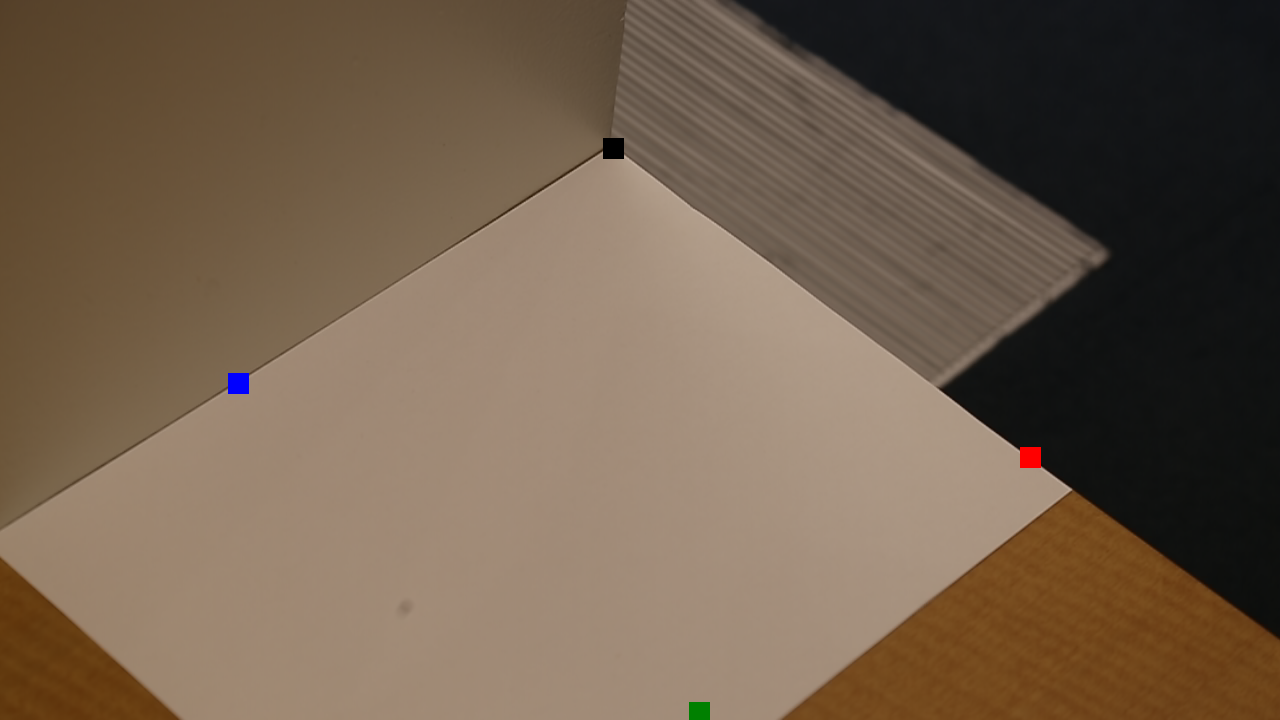

In [45]:
# Specify the corners of a square region around the edge of the wall you're 
# using as a camera. These are pixel coordinates, with the first point (black) 
# at the location of the bottom corner of the wall, and the remaining points
# arranged in the order shown by the red, green, and blue points
corners = [[149, 614], 
    [458, 1031], 
    [713, 700], 
    [384, 239]]

# Construct a source which will remember the background and corners
source = StaticSource(video, corners, background_im)

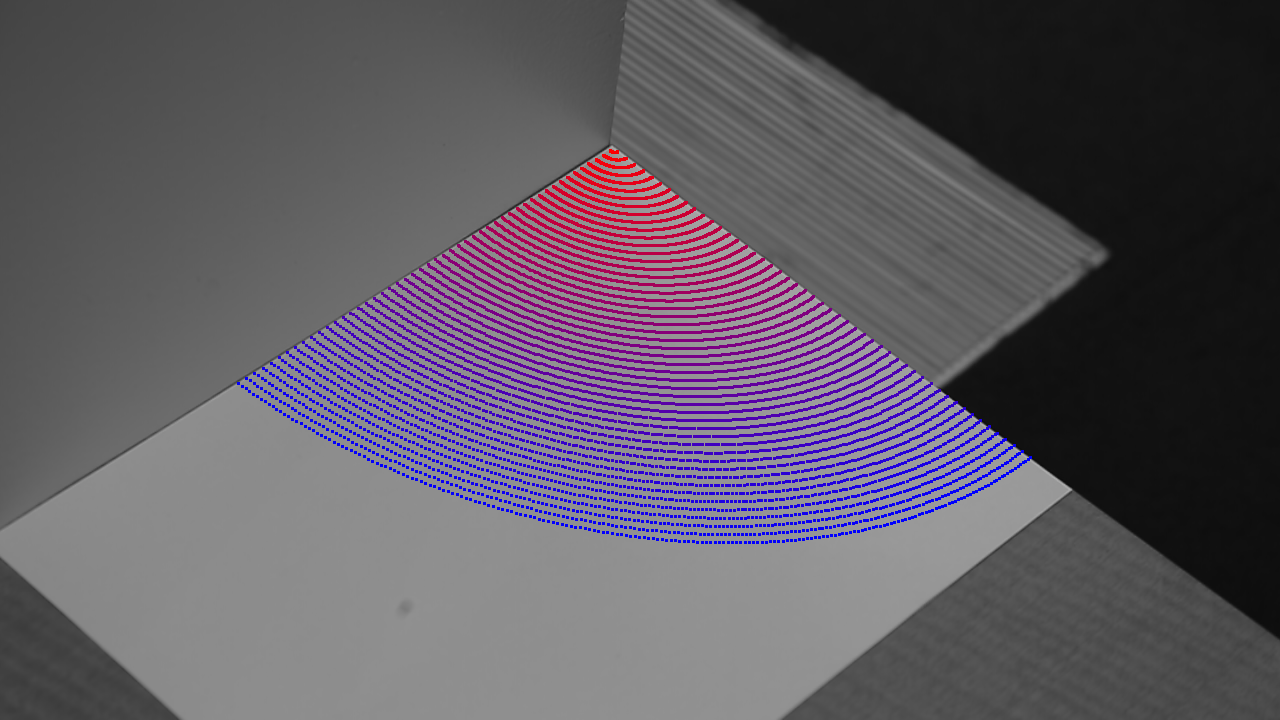

In [48]:
# Create an edge camera using the default parameters. 
# When an EdgeCamera is displayed in IJulia, it will 
# show its radially spaced samples
cam = EdgeCamera(source, Params())

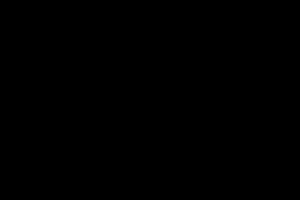

In [49]:
# Reconstruct the 1-D video from the edge camera data.
# This syntax means to reconstruct data from 0 seconds
# to 30 seconds at a frame rate of 10 frames per second.
trace = reconstruct(cam, (0u"s", 30u"s"), 10/u"s")

# The resulting values are extremely small, so just 
# viewing the image normally shows nothing:

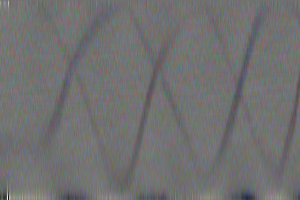

In [51]:
# To see the 1-D video, we just have to normalize the
# result so that all its values are between 0 and 1:
imadjustintensity(trace)

# Note the two sets of lines, one blue and one red, 
# indicating the motion of the two people in the 
# hidden scene (one wearing blue and one wearing red)

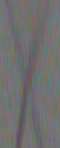

In [52]:
# The result of `reconstruct()` is actually an AxisArray
# from https://github.com/JuliaArrays/AxisArrays.jl

# That means that we can index into the resulting image
# by angle and by time using unitful quantities. For 
# example, let's take a slice of angles from 0.2 to π/4
# and times from 13s to 19s:
imadjustintensity(trace)[0.2..π/4, 13u"s"..19u"s"]